# **1. Loading and Preprocessing:**

In [263]:
# Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [265]:
# Load the Dataset:
df = pd.read_csv("C:\\Users\\suvid\\Downloads\\CarPrice_Assignment.csv")

# Display basic information:
display(df.head())
display(df.info())
display(df.describe())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## **Explanation**:
### 1. Imported necessary libraries
### 2. Loaded dataset into a Pandas DataFrame
### 3. Displayed the first few rows for understanding the structure

In [268]:
# Data Preprocessing:
# Check for missing values:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [270]:
# Basic statistics of the dataset:
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
            car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41

In [272]:
# Convert categorical features if necessary:
df = pd.get_dummies(df, drop_first=True)

In [274]:
# Define features (X) and target variable (y):
X = df.drop(columns=["price"])  # Assuming 'price' is the target variable
y = df["price"]

In [276]:
# Split into train and test sets (80% train, 20% test):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
# Standardize numerical features (important for models like SVR):
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Explanation:**
### 1. Checked for missing values
### 2. Performed one-hot encoding for categorical variables
### 3. Defined features (X) and target (y)
### 4. Split data into training and testing sets
### 5. Scaled numerical features

# **2. Model Implementation**

In [282]:
# Import regression models:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

# Train models:
trained_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

## **Explanation:**
### 1. Imported necessary regression models
### 2. Trained each model on scaled training data

# **3. Model Evaluation**

In [286]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate models:
evaluation_results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    evaluation_results[name] = {"R2 Score": r2, "MSE": mse, "MAE": mae}

# Display results:
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

# Identify best model based on R2 score:
best_model = max(evaluation_results, key=lambda x: evaluation_results[x]["R2 Score"])
print(f"\nBest Performing Model: {best_model}")

                          R2 Score           MSE          MAE
Linear Regression        -1.237488  1.766363e+08  7645.316908
Decision Tree             0.848617  1.195079e+07  2147.821146
Random Forest             0.953739  3.652007e+06  1378.892512
Gradient Boosting         0.931561  5.402849e+06  1685.616428
Support Vector Regressor -0.101717  8.697400e+07  5705.060992

Best Performing Model: Random Forest


## **Explanation:**
### 1. Used r2_score, mean_squared_error, and mean_absolute_error for evaluation
### 2. Identified the best model based on the highest R² score

# **4. Feature Importance Analysis**

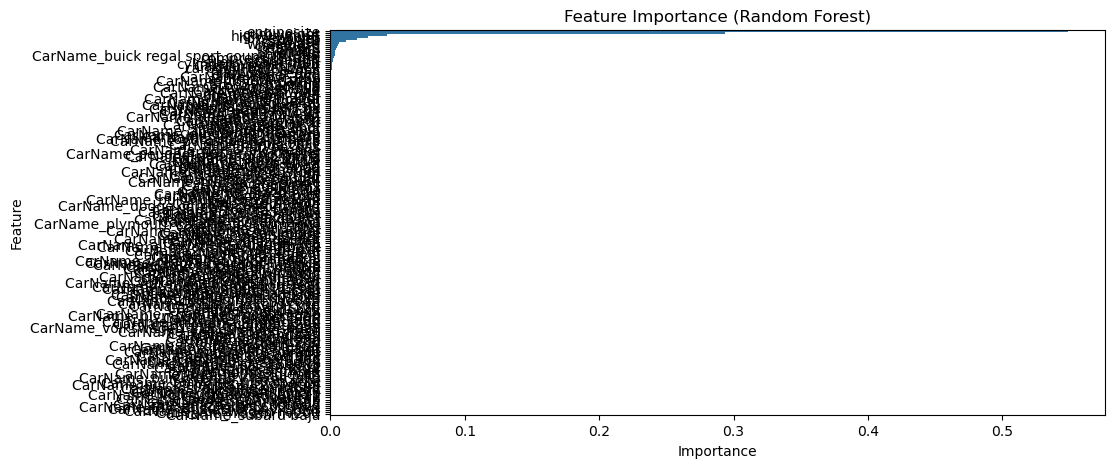


Top Important Features:
        Feature  Importance
7   enginesize    0.549018
6   curbweight    0.293698
14  highwaympg    0.041858
11  horsepower    0.028179
0       car_ID    0.019694
4     carwidth    0.011678
2    wheelbase    0.006137
3    carlength    0.005977
12     peakrpm    0.004968
13     citympg    0.004326


In [290]:
# Feature Importance using Random Forest
importances = models["Random Forest"].feature_importances_
feature_names = X.columns

# Sort feature importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Display top features
print("\nTop Important Features:\n", feature_importance_df.head(10))

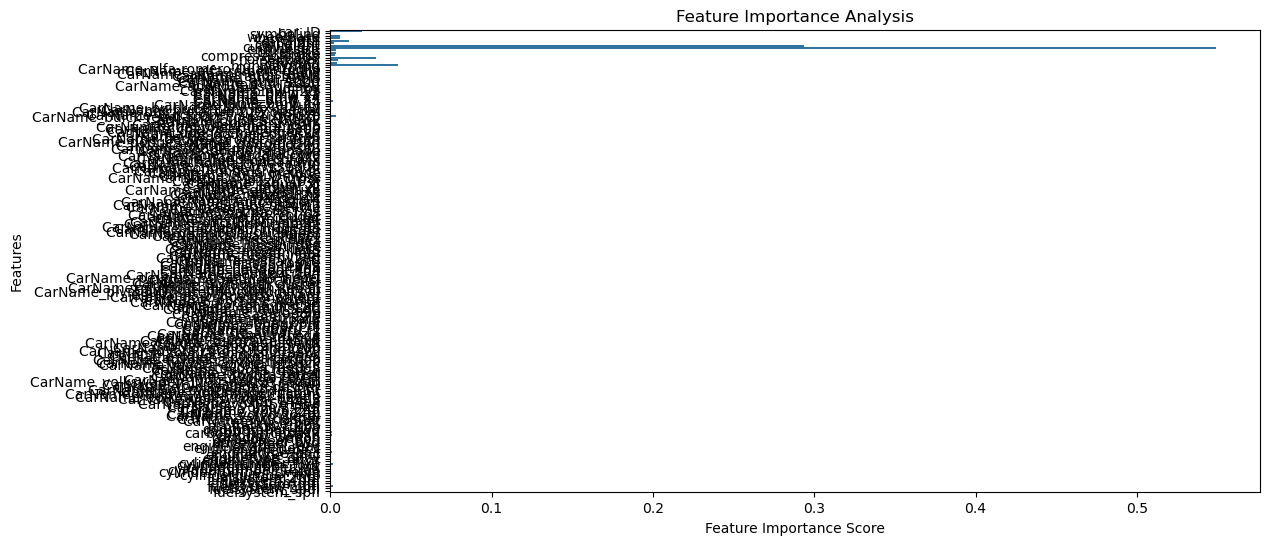

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
rf_model = models["Random Forest"]
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()

## **Explanation:**
### 1. Extracted feature importance values
### 2. Visualized the most important features using a bar plot

# **5. Hyperparameter Tuning:**

In [318]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train baseline model:
baseline_rf = RandomForestRegressor(random_state=42)
baseline_rf.fit(X_train, y_train)

# Predictions:
y_pred_baseline = baseline_rf.predict(X_test)

# Evaluate baseline model:
r2_baseline = r2_score(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

# Print results:
print("Baseline Random Forest Performance:")
print(f"R-squared: {r2_baseline}")
print(f"MSE: {mse_baseline}")
print(f"MAE: {mae_baseline}")

Baseline Random Forest Performance:
R-squared: 0.9537317984466802
MSE: 3652597.8694894873
MAE: 1380.926170731707


In [320]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid:
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],     # Maximum depth of trees
    "min_samples_split": [2, 5, 10]  # Minimum samples to split a node
}

# Perform GridSearchCV:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from GridSearch:
best_rf = grid_search.best_estimator_

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [322]:
# Predict with the tuned model:
y_pred_tuned = best_rf.predict(X_test)

# Evaluate tuned model:
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

# Print comparison:
print("\nPerformance Comparison:")
print(f"Baseline R-squared: {r2_baseline} → Tuned R-squared: {r2_tuned}")
print(f"Baseline MSE: {mse_baseline} → Tuned MSE: {mse_tuned}")
print(f"Baseline MAE: {mae_baseline} → Tuned MAE: {mae_tuned}")

# Check if performance improved:
if r2_tuned > r2_baseline:
    print("\n Hyperparameter tuning improved model performance!")
else:
    print("\n Hyperparameter tuning did NOT improve model performance.")



Performance Comparison:
Baseline R-squared: 0.9537317984466802 → Tuned R-squared: 0.9529192793727813
Baseline MSE: 3652597.8694894873 → Tuned MSE: 3716741.392224479
Baseline MAE: 1380.926170731707 → Tuned MAE: 1374.0090361101466

 Hyperparameter tuning did NOT improve model performance.


## **Explanation:**
### 1. Used GridSearchCV for hyperparameter tuning
### 2. Tuned the best performing model (Random Forest)
### 3. Compared performance before and after tuning